# Task 1:

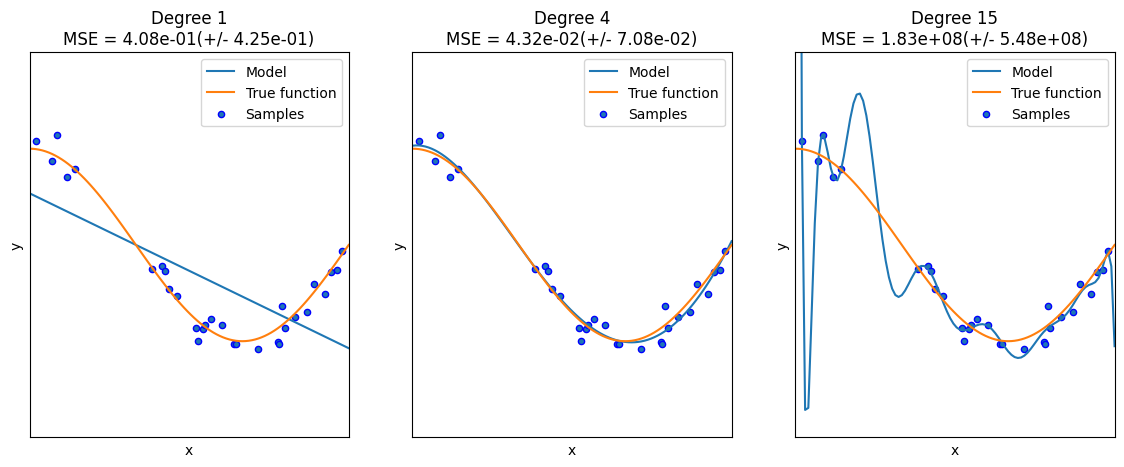

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov  1 23:34:25 2022

@author: Kuba

https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # model evaluation using cross-validation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Degree {degrees[i]}\nMSE = {-scores.mean():.2e}(+/- {scores.std():.2e})")
        
plt.show()

The variable responsible for the number of training samples - n_samples

Level of noise is controlled by number at the end of this line: y = true_fun(X) + np.random.randn(n_samples) * 0.1

Now noise level is 0.1

The degrees of the polynomial are stored in the list - degrees

The more data samples we provide, the model will better fit to new data, but time of training will be longer.

The more we increase noise level, it will be harder for model to fit to data accurately. Accuracy will be lower

If we increase the degree of the polynomial features, models complexity will inccrease. 

Adjusting the degree of a polynomial impacts the complexity of the models. Models with a lower degree might not capture the underlying patterns in the data sufficiently, leading to underfitting. On the other hand, models with a higher degree can become too tailored to the specific dataset, causing overfitting. In provided example, a polynomial of degree 1 fails to capture the data's intricacies, a polynomial of degree 4 models the data accurately, and a polynomial of degree 15 becomes excessively complex, fitting the data too closely.

# Task 2:

Confusion Matrix:
[[ 8  0]
 [ 0 12]]
Accuracy: 1.00
F1-score: 1.00
Jaccard Coefficient: 1.00


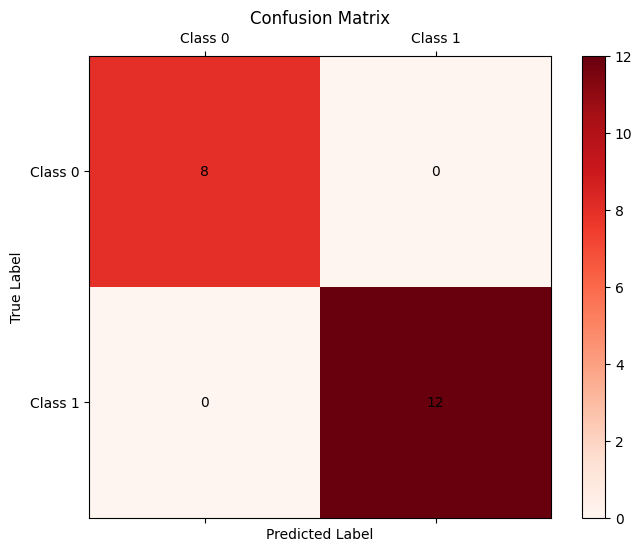

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, jaccard_score

iris = load_iris()
X = iris.data
y = iris.target

# Take only classes 0 and 1 from dataset
binary_class_indices = np.where((y == 0) | (y == 1))
X_binary = X[binary_class_indices]
y_binary = y[binary_class_indices]

X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=np.random.randint(0, 1000))

# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier using the specified metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
jaccard = jaccard_score(y_test, y_pred)

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Jaccard Coefficient: {jaccard:.2f}")

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(conf_matrix, cmap='Reds')
plt.colorbar(cax)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Class 0', 'Class 1'])
ax.set_yticklabels(['Class 0', 'Class 1'])

plt.show()


Accuracy is the ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances.

The F1-score is the harmonic mean of precision and recall. It balances the trade-off between precision (the proportion of positive predictions that are actually correct) and recall (the proportion of actual positives that are correctly predicted).

The Jaccard Coefficient, measures the similarity between the predicted and actual classes. It is defined as the size of the intersection divided by the size of the union of the predicted and actual classes.

The confusion matrix is used to evaluate the performance of a binary classification model. It shows the counts of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

# Task 3:

In [146]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

iris = load_iris()

X = iris.data[:, 0].reshape(-1, 1)  # Sepal length
y = iris.data[:, 1]  # Sepal width

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(0, 1000))

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

y_pred = linear_regression.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Explained Variance Score:", explained_variance)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 0.2504662601072714
Mean Absolute Error (MAE): 0.3893202728782373
Explained Variance Score: -0.03806325736865923
R-squared (R2) Score: -0.04919541120104376
